# Import library 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset

In [2]:
df = pd.read_csv('data_interview.csv')

# Dataset overview

In [3]:
df.head(10)

,Unnamed: 0,date_time,event_name,level,user,day_diff,day0,mode_game,win,reason_to_die,quantity,version
0,40,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0
1,41,2023-10-28,game_start,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0
2,42,2023-10-28,game_start,2,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0
3,43,2023-10-28,game_start,3,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0
4,44,2023-10-28,game_start,4,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,NaN,NaN,0,1.6.0
5,45,2023-10-30,game_start,5,1cffd052-4616-4d29-bfd5-950e23b763d4,2.0,2023-10-28,normal,NaN,NaN,0,1.6.0
6,46,2023-10-30,game_start,5,1cffd052-4616-4d29-bfd5-950e23b763d4,2.0,2023-10-28,normal,NaN,NaN,0,1.6.0
7,47,2023-11-02,game_start,5,1cffd052-4616-4d29-bfd5-950e23b763d4,5.0,2023-10-28,normal,NaN,NaN,0,1.6.0
8,48,2023-10-28,game_end,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,0.0,out_of_lives,31,1.6.0
9,49,2023-10-28,game_end,1,1cffd052-4616-4d29-bfd5-950e23b763d4,0.0,2023-10-28,normal,1.0,NaN,18,1.6.0


In [4]:
print("Data shape: ", df.shape)

Data shape:  (798332, 12)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 798332 entries, 0 to 798331
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     798332 non-null  int64  
 1   date_time      798332 non-null  object 
 2   event_name     798332 non-null  object 
 3   level          798332 non-null  int64  
 4   user           798332 non-null  object 
 5   day_diff       798332 non-null  float64
 6   day0           798332 non-null  object 
 7   mode_game      798332 non-null  object 
 8   win            243697 non-null  float64
 9   reason_to_die  117413 non-null  object 
 10  quantity       798332 non-null  int64  
 11  version        798332 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 73.1+ MB


In [6]:
df.columns

Index(['Unnamed: 0', 'date_time', 'event_name', 'level', 'user', 'day_diff',
       'day0', 'mode_game', 'win', 'reason_to_die', 'quantity', 'version'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,level,day_diff,win,quantity
count,7.983320e+05,798332.000000,798332.000000,243697.000000,798332.000000
mean,2.453789e+06,22.252668,0.999837,0.518201,14.797696
std,1.408433e+06,42.809470,1.712700,0.499670,54.181532
min,4.000000e+01,1.000000,0.000000,0.000000,-2.000000
25%,1.243709e+06,3.000000,0.000000,0.000000,0.000000
50%,2.470328e+06,9.000000,0.000000,1.000000,0.000000
75%,3.570308e+06,21.000000,1.000000,1.000000,12.000000
max,7.957952e+06,519.000000,7.000000,1.000000,15642.000000


In [8]:
print("Data is duplicated: ",df.duplicated().any())

Data is duplicated:  False


In [9]:
print("THE NUMBER OF UNIQUE VALUES BY COLUMNS:")
df.nunique()

THE NUMBER OF UNIQUE VALUES BY COLUMNS:


Unnamed: 0       798332
date_time            14
event_name            4
level               519
user              13584
day_diff              8
day0                  7
mode_game             4
win                   2
reason_to_die         2
quantity           1038
version               2
dtype: int64

In [10]:
# The percentage of missing values for each feature
missing_values = df.isnull().sum()
total_values = df.shape[0]
missing_percentages = (missing_values / total_values) * 100
missing_value = pd.DataFrame({'Feature': missing_values.index, 'Missing Value (%)': missing_percentages})
missing_value

,Feature,Missing Value (%)
Unnamed: 0,Unnamed: 0,0.000000
date_time,date_time,0.000000
event_name,event_name,0.000000
level,level,0.000000
user,user,0.000000
day_diff,day_diff,0.000000
day0,day0,0.000000
mode_game,mode_game,0.000000
win,win,69.474229
reason_to_die,reason_to_die,85.292710


In [11]:
print("Number of NaN values:\t", df.isna().sum().sum())

Number of NaN values:	 1235554


# Data preprocessing

In [12]:
df['date_time'] = pd.to_datetime(df['date_time'])

In [13]:
data_v1_5_2 = df[df['version'] == '1.5.2']
data_v1_6_0 = df[df['version'] == '1.6.0']

# Question

1. How can we know if the improvement of Tutorial in-game version 1.6.0 has impacted the User Experience better than in-game
version 1.5.2?

In [14]:
skipped_tutorial_users = df[(df['event_name'].str.contains("tutorial")) & (df['quantity'] == 0)]['user'].unique()

skipped_win_data = df[(df['user'].isin(skipped_tutorial_users)) & (df['event_name'] == 'game_end')]

win_rate_v1_5_2 = (skipped_win_data[skipped_win_data['version'] == '1.5.2']['win']).mean()
win_rate_v1_6_0 = (skipped_win_data[skipped_win_data['version'] == '1.6.0']['win']).mean()

print(f"Win Rate for users who skipped the tutorial in Version 1.5.2: {win_rate_v1_5_2:.2%}")
print(f"Win Rate for users who skipped the tutorial in Version 1.6.0: {win_rate_v1_6_0:.2%}")

Win Rate for users who skipped the tutorial in Version 1.5.2: 61.26%
Win Rate for users who skipped the tutorial in Version 1.6.0: 58.42%


In [15]:
tutorial_data = df[df['event_name'].str.contains("tutorial")]

tutorial_data['tutorial_status'] = tutorial_data['quantity'].map({
    -2: 'complete',
    -1: 'start',
    0: 'skip',
    1: 'step_1',
    2: 'step_2',
    3: 'step_3',
    4: 'step_4'  # Assume there are up to 4 steps, can adjust based on max step observed
})

tutorial_metrics = tutorial_data.groupby(['version', 'tutorial_status'])['user'].nunique().unstack().fillna(0)

tutorial_metrics['completion_rate'] = tutorial_metrics['complete'] / tutorial_metrics['start']
tutorial_metrics['skip_rate'] = tutorial_metrics['skip'] / (tutorial_metrics['start'] + tutorial_metrics['skip'])

tutorial_metrics


C:\Users\Tuan Kiet\AppData\Local\Temp\ipykernel_12308\4199515728.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tutorial_data['tutorial_status'] = tutorial_data['quantity'].map({


tutorial_status,complete,skip,start,step_1,step_2,step_3,step_4,completion_rate,skip_rate
version,,,,,,,,,
1.5.2,6341,336,6626,6465,6395,6372,6350,0.956988,0.048262
1.6.0,6571,356,6855,6686,6630,6612,6601,0.958570,0.049369


In [16]:
completed_tutorial_v1_5_2 = df[(df['version'] == '1.5.2') & (df['event_name'] == 'tutorial') & (df['quantity'] == -2)]
started_tutorial_v1_5_2 = df[(df['version'] == '1.5.2') & (df['event_name'] == 'tutorial') & (df['quantity'] == -1)]
completion_rate_v1_5_2 = len(completed_tutorial_v1_5_2) / len(started_tutorial_v1_5_2) if len(started_tutorial_v1_5_2) > 0 else 0

completed_tutorial_v1_6_0 = df[(df['version'] == '1.6.0') & (df['event_name'] == 'tutorial') & (df['quantity'] == -2)]
started_tutorial_v1_6_0 = df[(df['version'] == '1.6.0') & (df['event_name'] == 'tutorial') & (df['quantity'] == -1)]
completion_rate_v1_6_0 = len(completed_tutorial_v1_6_0) / len(started_tutorial_v1_6_0) if len(started_tutorial_v1_6_0) > 0 else 0

tutorial_analysis_data = {
    "Metric": ["Completed Tutorials", "Started Tutorials", "Completion Rate"],
    "Version 1.5.2": [
        len(completed_tutorial_v1_5_2), 
        len(started_tutorial_v1_5_2), 
        completion_rate_v1_5_2
    ],
    "Version 1.6.0": [
        len(completed_tutorial_v1_6_0), 
        len(started_tutorial_v1_6_0), 
        completion_rate_v1_6_0
    ]
}

tutorial_df = pd.DataFrame(tutorial_analysis_data)
print(tutorial_df.to_string(index=False))

             Metric  Version 1.5.2  Version 1.6.0
Completed Tutorials    6497.000000    6712.000000
  Started Tutorials    6988.000000    7224.000000
    Completion Rate       0.929737       0.929125


In [17]:
users_completed_tutorial_v1_5_2 = completed_tutorial_v1_5_2['user'].unique()
win_rate_after_tutorial_v1_5_2 = df[(df['user'].isin(users_completed_tutorial_v1_5_2)) & (df['event_name'] == 'game_end')]['win'].mean()

users_completed_tutorial_v1_6_0 = completed_tutorial_v1_6_0['user'].unique()
win_rate_after_tutorial_v1_6_0 = df[(df['user'].isin(users_completed_tutorial_v1_6_0)) & (df['event_name'] == 'game_end')]['win'].mean()

print(f"Win Rate After Tutorial in Version 1.5.2: {win_rate_after_tutorial_v1_5_2:.2%}")
print(f"Win Rate After Tutorial in Version 1.6.0: {win_rate_after_tutorial_v1_6_0:.2%}")

Win Rate After Tutorial in Version 1.5.2: 52.02%
Win Rate After Tutorial in Version 1.6.0: 50.76%


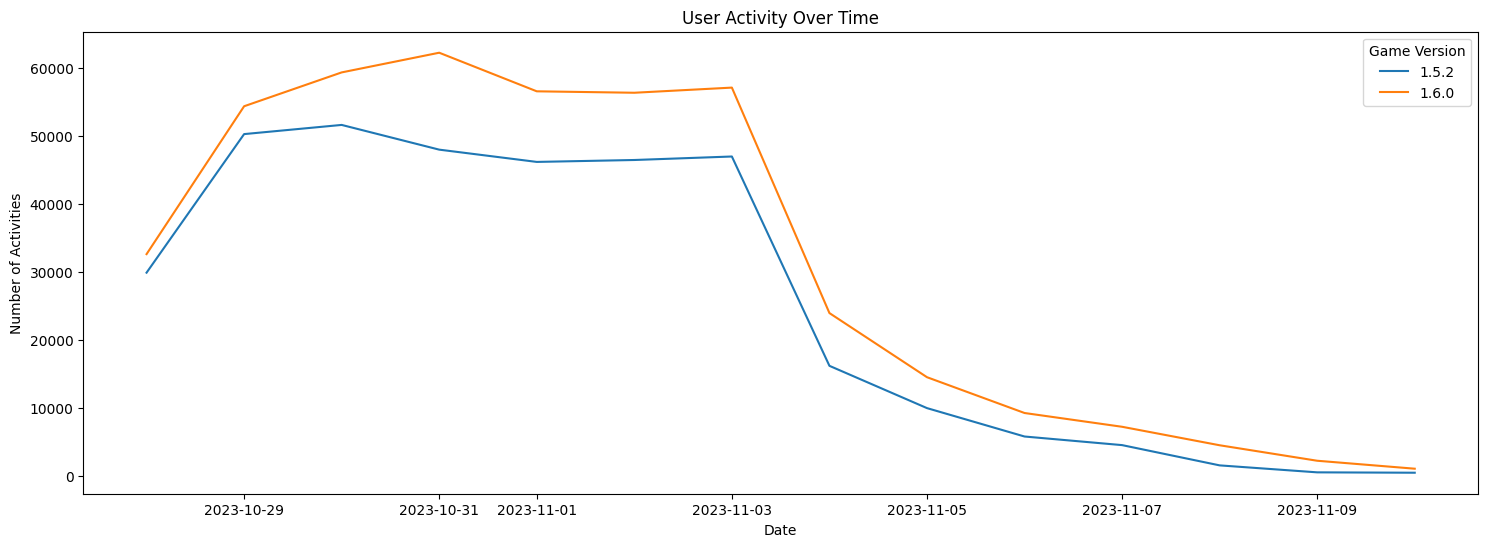

In [18]:
activity_over_time = df.groupby([df['date_time'].dt.date, 'version']).size().unstack()

activity_over_time.plot(kind='line', figsize=(18, 6))
plt.title('User Activity Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Activities')
plt.legend(title='Game Version')
plt.show()

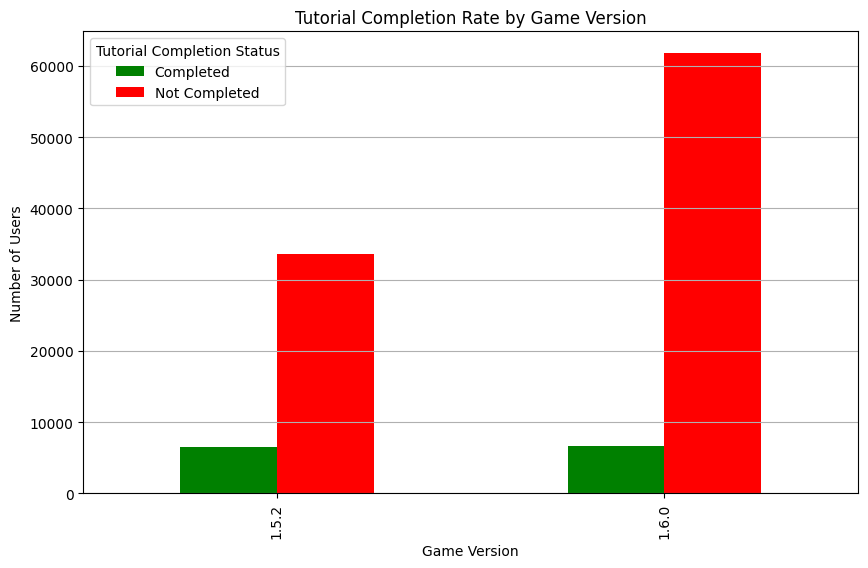

In [19]:
tutorial_data = df[df['event_name'] == 'tutorial']

completed_tutorial = tutorial_data[tutorial_data['quantity'] == -2]

completion_counts = completed_tutorial.groupby('version').size()
non_completion_counts = tutorial_data.groupby('version').size() - completion_counts

completion_df = pd.DataFrame({
    'Completed': completion_counts,
    'Not Completed': non_completion_counts
}).fillna(0)

completion_df.plot(kind='bar', stacked=False, figsize=(10, 6), color=['green', 'red'])
plt.title('Tutorial Completion Rate by Game Version')
plt.xlabel('Game Version')
plt.ylabel('Number of Users')
plt.legend(title='Tutorial Completion Status')
plt.grid(axis='y')
plt.show()

## Question 1

* Analyze the win rates of users who complete the tutorial in each version. An decrease in win rate among those who completed the tutorial in version 1.6.0 (52.02% to 50.76%) would indicate a more ineffective tutorial.

* However, the win rate of users skipping tutorial of version 1.5.2 is greater than version 1.6.0 (61.26% - 58.42%).

2. . Can we roll out 100% game version 1.6.0 to all users or not? Why? (Analyze and evaluate the 2 versions).

In [20]:
win_rate_v1_5_2 = data_v1_5_2['win'].dropna().mean()
win_rate_v1_6_0 = data_v1_6_0['win'].dropna().mean()

level_progression_v1_5_2 = data_v1_5_2.groupby('user')['level'].max()
level_progression_v1_6_0 = data_v1_6_0.groupby('user')['level'].max()

retention_v1_5_2 = data_v1_5_2.groupby('user')['day_diff'].max()
retention_v1_6_0 = data_v1_6_0.groupby('user')['day_diff'].max()

results = {
    'Metric': ['Win Rate', 'Average Max Level', 'Average Retention Days'],
    'Version 1.5.2': [win_rate_v1_5_2, level_progression_v1_5_2.mean(), retention_v1_5_2.mean()],
    'Version 1.6.0': [win_rate_v1_6_0, level_progression_v1_6_0.mean(), retention_v1_6_0.mean()]
}

results_df = pd.DataFrame(results)

print(results_df.to_string(index=False))

                Metric  Version 1.5.2  Version 1.6.0
              Win Rate       0.526497       0.511107
     Average Max Level       9.414780      10.321691
Average Retention Days       0.981562       1.246789


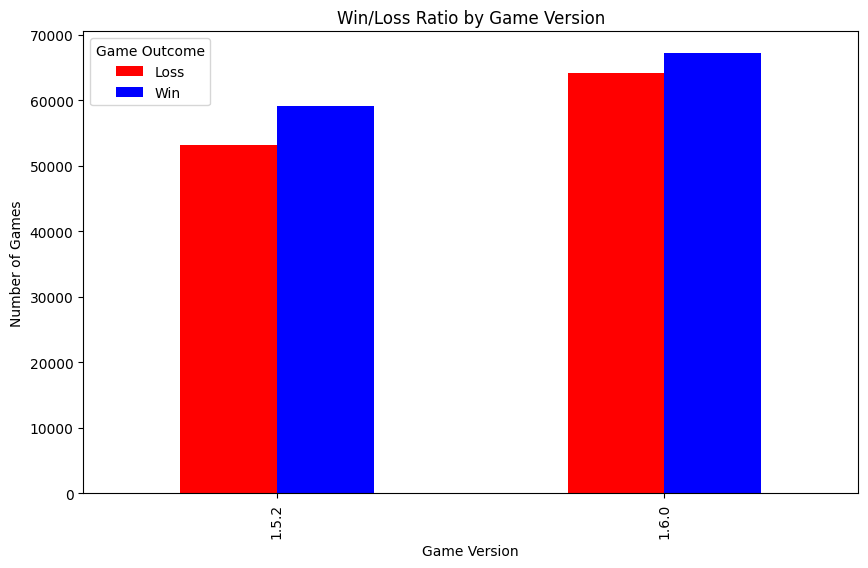

In [21]:
game_end_data = df[df['event_name'] == 'game_end']

win_loss_counts = game_end_data.groupby(['version', 'win']).size().unstack(fill_value=0)

win_loss_counts.plot(kind='bar', stacked=False, figsize=(10, 6), color=['red', 'blue'])
plt.title('Win/Loss Ratio by Game Version')
plt.xlabel('Game Version')
plt.ylabel('Number of Games')
plt.legend(['Loss', 'Win'], title='Game Outcome')
plt.show()

## Question 2

* It can be seen that the statistical comparison of win rates between the two versions is nearly identical, with only a [1%] difference. There's a slight decrease in the win rate in version 1.6.0 compared to 1.5.2. This could be an indicator of increased game difficulty or adjustments in the game mechanics that might not be wholly favorable.

* Players reach higher levels on average in version 1.6.0, suggesting that they are engaged enough to progress further in the game, which could be a result of improved tutorial guidance or game design that better facilitates player progression.

* There's a noticeable increase in retention days in version 1.6.0, indicating that players are sticking with the game longer. This is a strong positive signal suggesting that the new version is more engaging or compelling.

***Before a full rollout, consider conducting a segmented analysis of different user groups (e.g., new vs. returning players) to see if there are varying impacts that might require tailored adjustments. If feasible, continue running A/B tests to compare other outcomes between the versions. This can provide ongoing insights and help in tweaking game mechanics to optimize user experience further.***

## Question 3

3. Based on the data and your experience with the game, do you have any ideas to improve our User Experience? Explain it in detail
(image, text, diagram, logic, game mechanics,...)

* Customizable Avatars and Interfaces: I believe we should allow users to upload their own images to use as their in-game avatars. This could help them feel more invested in the experience and potentially increase their retention rates.

* When I try to play, there are a lot of ads that pop up, which can be frustrating. Perhaps we could decrease the number of ads shown to improve player satisfaction and the overall gaming experience. I also checked the reviews of users on Google Play, and they complain a lot about the ads. To address this, I think we should consider adjusting the ad duration from 30 seconds to 15 seconds to create a less disruptive experience for players.

* Enhanced Social Features: Develop more robust social features, such as guilds, teams, and social challenges that encourage interaction. Integrate these features with social media to enhance community feeling.

* Live Events: Regularly schedule live events or competitions that encourage players to engage at specific times, increasing community interaction and game longevity.

<b>Implement a step-by-step hint system:</b>

1. Identify the Next Logical Step:

* Analyze the current state of the puzzle to find the next logical move that the player can make based on the existing numbers and filled cells.

2. Provide Incremental Hints:

* Start by highlighting the row or column where a logical move is possible.
* Offer further hints by indicating specific cells that can be filled or marked with an X.

3. Explain the Logic:

* Accompany the hint with a brief explanation of the logic behind the move, helping players understand the reasoning process.